12:55:27 - cmdstanpy - INFO - Chain [1] start processing
12:55:30 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\yepas\OneDrive\Desktop\econ8310-assignment1\.venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


                      ds         yhat
8760 2019-01-01 00:00:00  7615.927859
8761 2019-01-01 01:00:00  5135.544094
8762 2019-01-01 02:00:00  2654.957458
8763 2019-01-01 03:00:00   860.327317
8764 2019-01-01 04:00:00   619.782458


C:\Users\yepas\AppData\Local\Temp\ipykernel_9540\1834449531.py:31: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


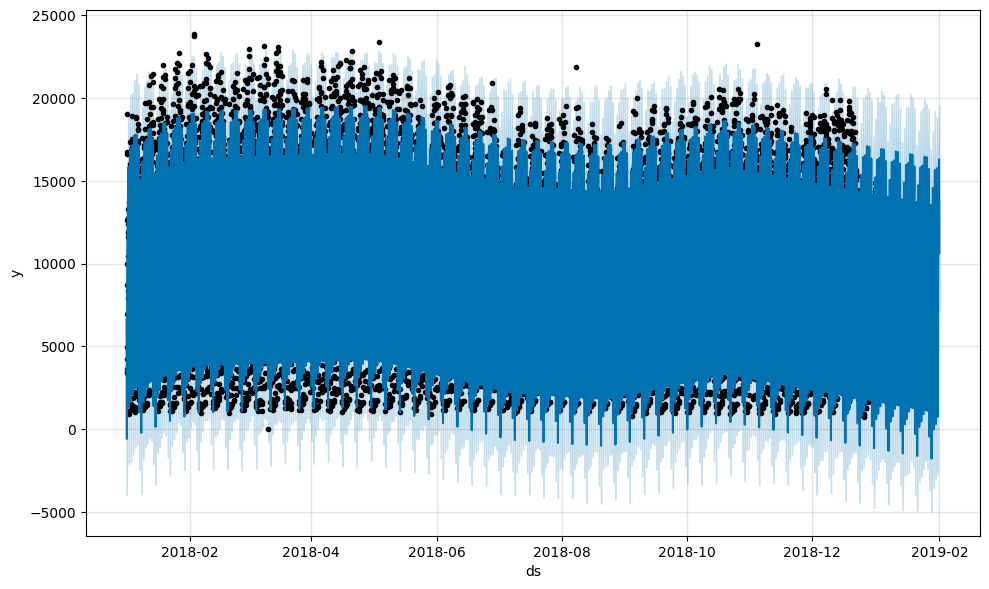

In [2]:
import pandas as pd
from prophet import Prophet

# Load data
data = pd.read_csv("assignment_data_train.csv")

# Convert 'Timestamp' column to datetime format
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

# Rename columns for Prophet compatibility
data = data.rename(columns={'Timestamp': 'ds', 'trips': 'y'})

# Initialize and fit the model
model = Prophet()
modelFit = model.fit(data)

# Create a future dataframe for 744 hours (January of the next year)
future = model.make_future_dataframe(periods=744, freq='H')

# Generate predictions
forecast = model.predict(future)

# Extract predictions for the test period
pred = forecast[['ds', 'yhat']].tail(744)

# Display first few predictions
print(pred.head())

# Plot forecast
fig = model.plot(forecast)
fig.show()